<a href="https://colab.research.google.com/github/AycaCicek/employee-machinelearning-/blob/main/adult_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# kütüphaneleri import etme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
adult=pd.read_csv('/content/adult.csv')
adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


   

1. Data set contains:
* age: 16 -100  
* workclass: employment sector (whether the person is employed in a private, gov or other)  
*fnlwgt (continuous values) - sampling weight   
*education: grade of education   
*education-num: grade of education numeric, sorted
*marital-status: marital status of the person
*relationship: value associated with the family, only one *value assigned to the person (eg wife, not-in-family)
*race: human race
*sex: Female, Male.
*capital-gain received that year, apart from salary.
*capital-loss losses of capital incurred that year, apart from salary.
*hours-per-week: number of hours worked per week
*native-country - home country
*Target: >50K, <=50K - values ​​showing, whether a person will earn more than 50k per year on not (binary feature).  
  




Görüldüğü gibi nan değeri gözükmememktedir.Fakat veride  görüldüğü üzere kayıp veriler yerine ? koyulmuştur.


In [ ]:
# datanın boyutu
print('Rows: {} Columns: {}'.format(adult.shape[0], adult.shape[1]))

Rows: 32561 Columns: 15


In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#null değerleri %
round((adult.isnull().sum() / adult.shape[0]) * 100,2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [ ]:
adult.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
# ? analizi %
round((adult.isin(['?']).sum() / adult.shape[0])* 100,2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [ ]:
percentage_income =adult['income'].value_counts(normalize=True)
round(percentage_income * 100, 2).astype('str') + ' %'

<=50K    75.92 %
>50K     24.08 %
Name: income, dtype: object

In [ ]:
adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## İKİNCİ ADIM:VERİ GÖRSELLEŞTİRME



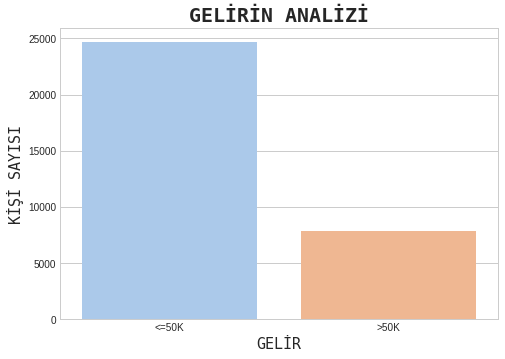

In [ ]:
# BARPLOT 'Income'
income = adult['income'].value_counts()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values,palette="pastel")
plt.title('GELİRİN ANALİZİ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('GELİR', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('KİŞİ SAYISI', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

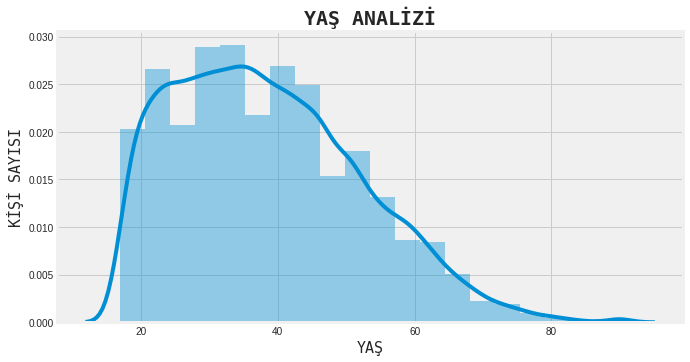

In [ ]:
age = adult['age'].value_counts()
plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(adult['age'], bins=20)
plt.title('YAŞ ANALİZİ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('YAŞ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('KİŞİ SAYISI', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

In [ ]:
# Creating a barplot for 'Education'
education = adult['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(education.values, education.index, palette='Paired')
plt.title('EĞİTİMİN ANALİZİ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('KİŞİ SAYISI', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('EĞİTİM', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

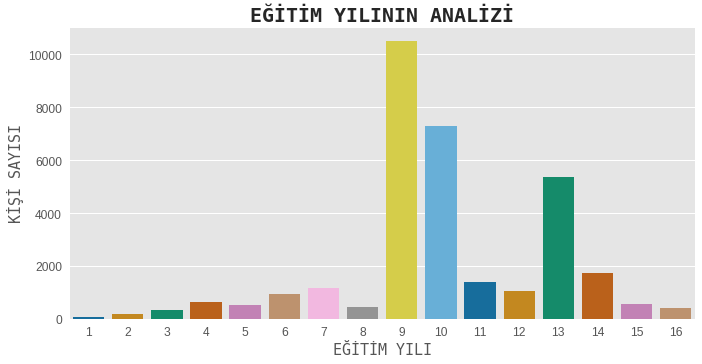

In [ ]:
# Creating a barplot for 'Years of Education'
education_number = adult['education.num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(education_number.index, education_number.values, palette='colorblind')
plt.title('EĞİTİM YILININ ANALİZİ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('EĞİTİM YILI', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('KİŞİ SAYISI', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

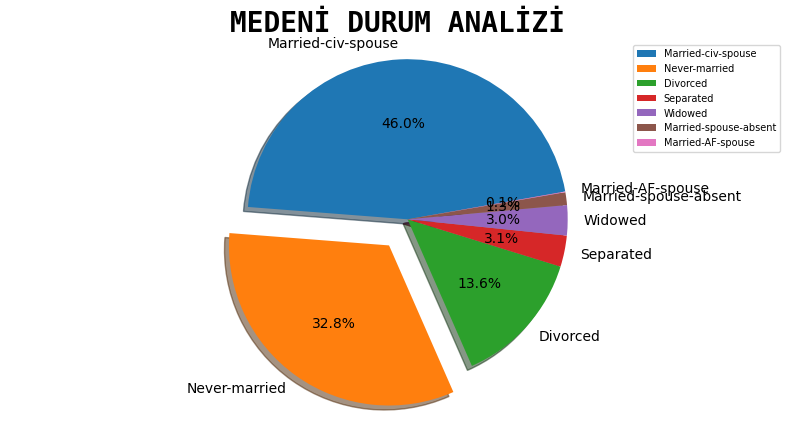

In [ ]:
marital = adult['marital.status'].value_counts()
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.2, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('MEDENİ DURUM ANALİZİ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

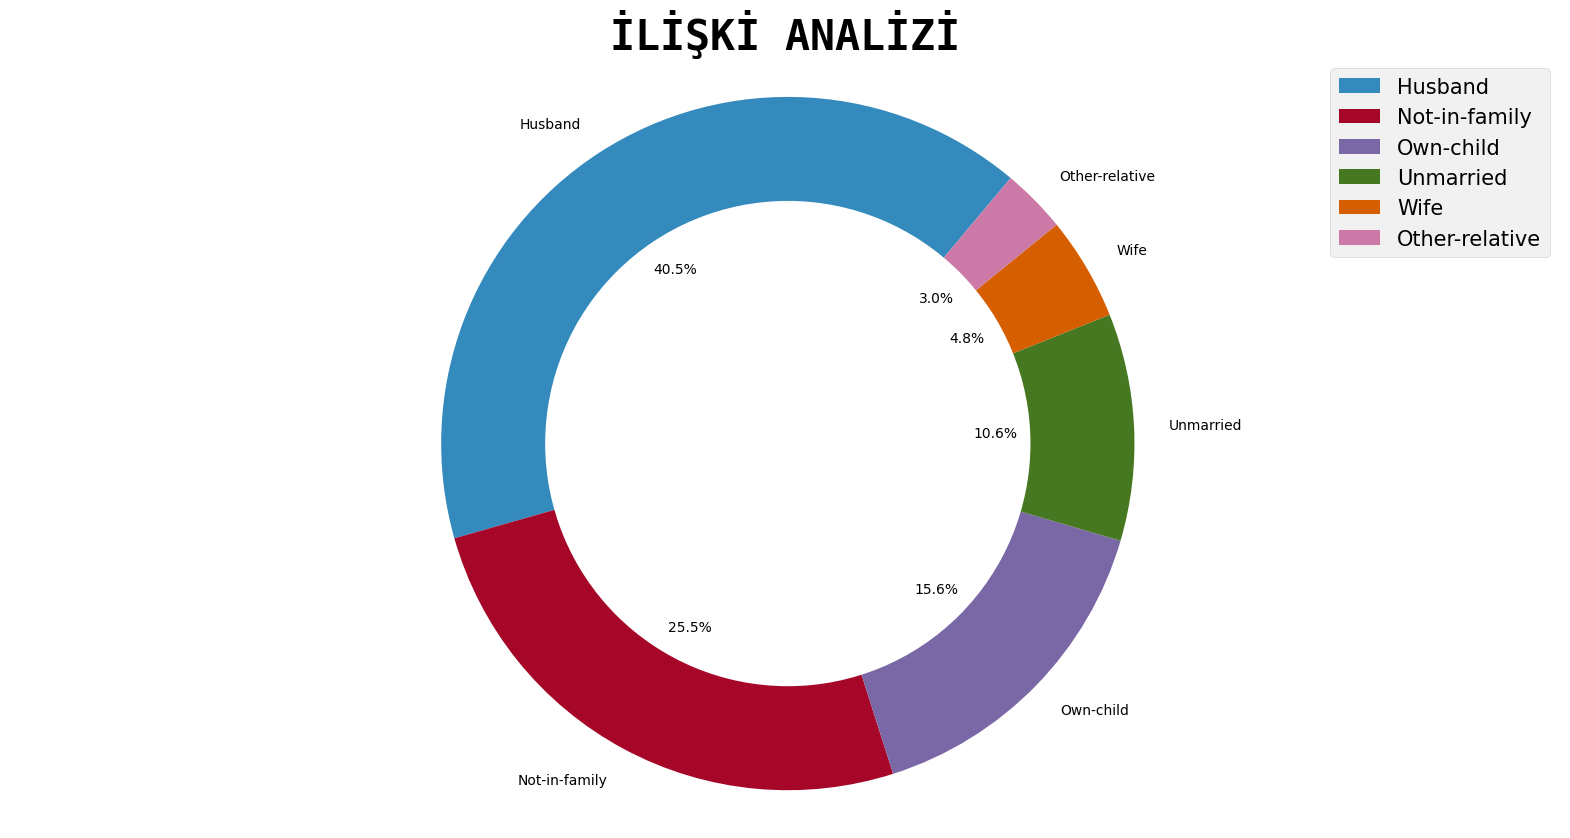

In [ ]:
relation = adult['relationship'].value_counts()
plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('İLİŞKİ ANALİZİ', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

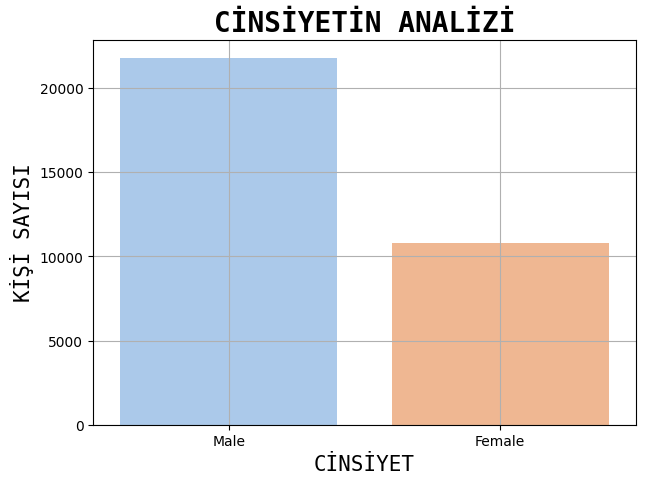

In [ ]:
sex = adult['sex'].value_counts()
plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values,palette="pastel")
plt.title('CİNSİYETİN ANALİZİ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('CİNSİYET', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('KİŞİ SAYISI', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

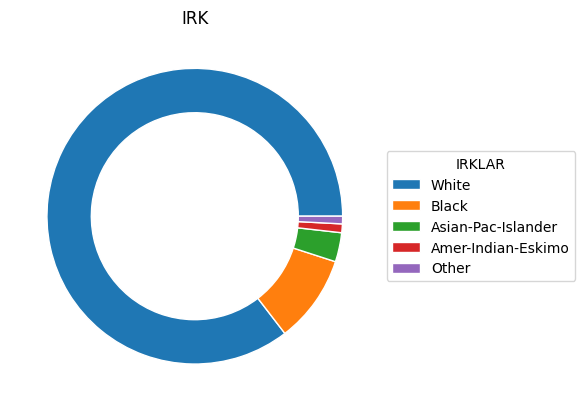

In [ ]:
fig, ax = plt.subplots()
size = 0.3
race = adult['race'].value_counts()
ax.pie(race, radius=1, wedgeprops=dict(width=size, edgecolor='w'))
ax.legend(race.index,title="IRKLAR", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
ax.set(aspect="equal", title='IRK')
plt.show()

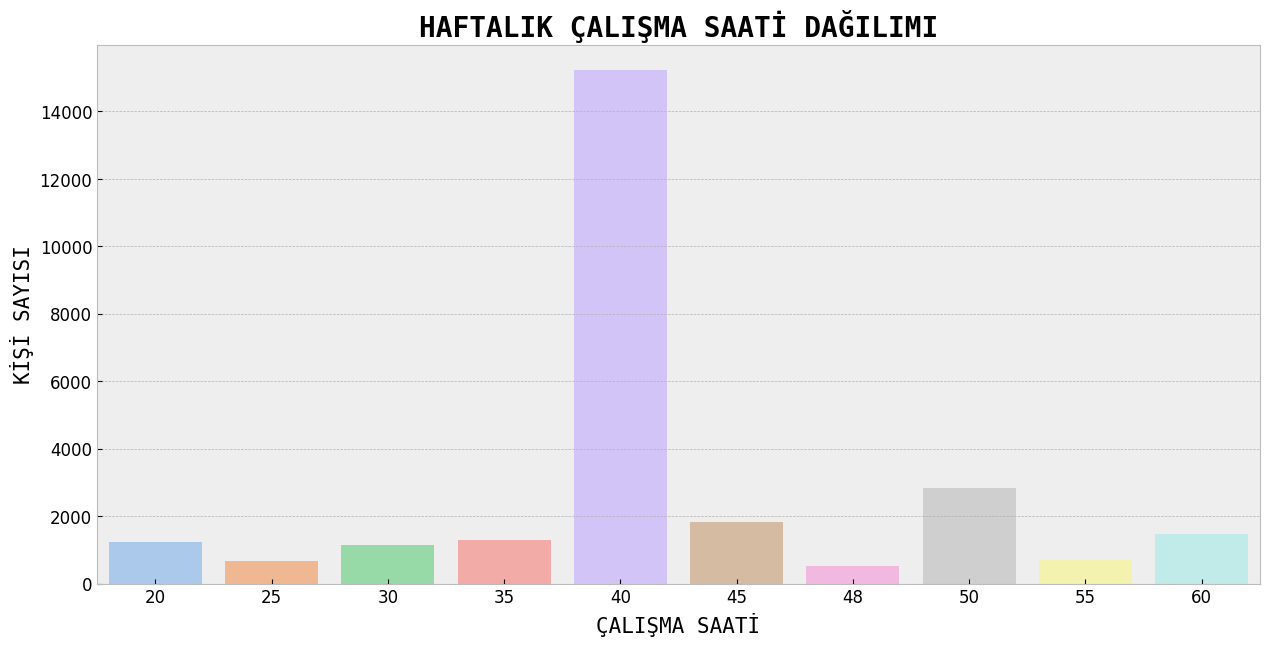

In [ ]:
hours = adult['hours.per.week'].value_counts().head(10)
plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='pastel')
plt.title('HAFTALIK ÇALIŞMA SAATİ DAĞILIMI', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('ÇALIŞMA SAATİ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('KİŞİ SAYISI', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

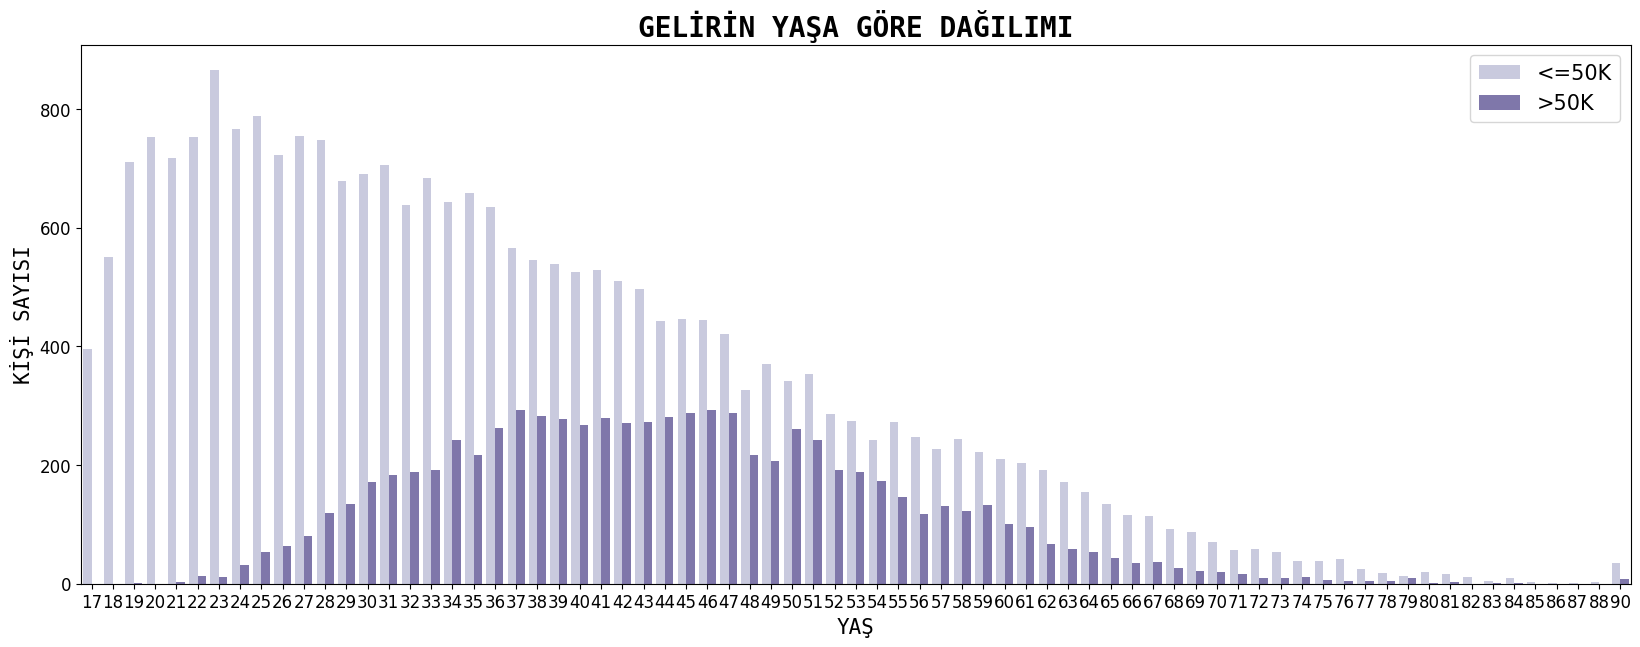

In [ ]:
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(adult['age'], hue=adult['income'],palette="Purples")
plt.title('GELİRİN YAŞA GÖRE DAĞILIMI', fontdict={ 'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('YAŞ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('KİŞİ SAYISI', fontdict={ 'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

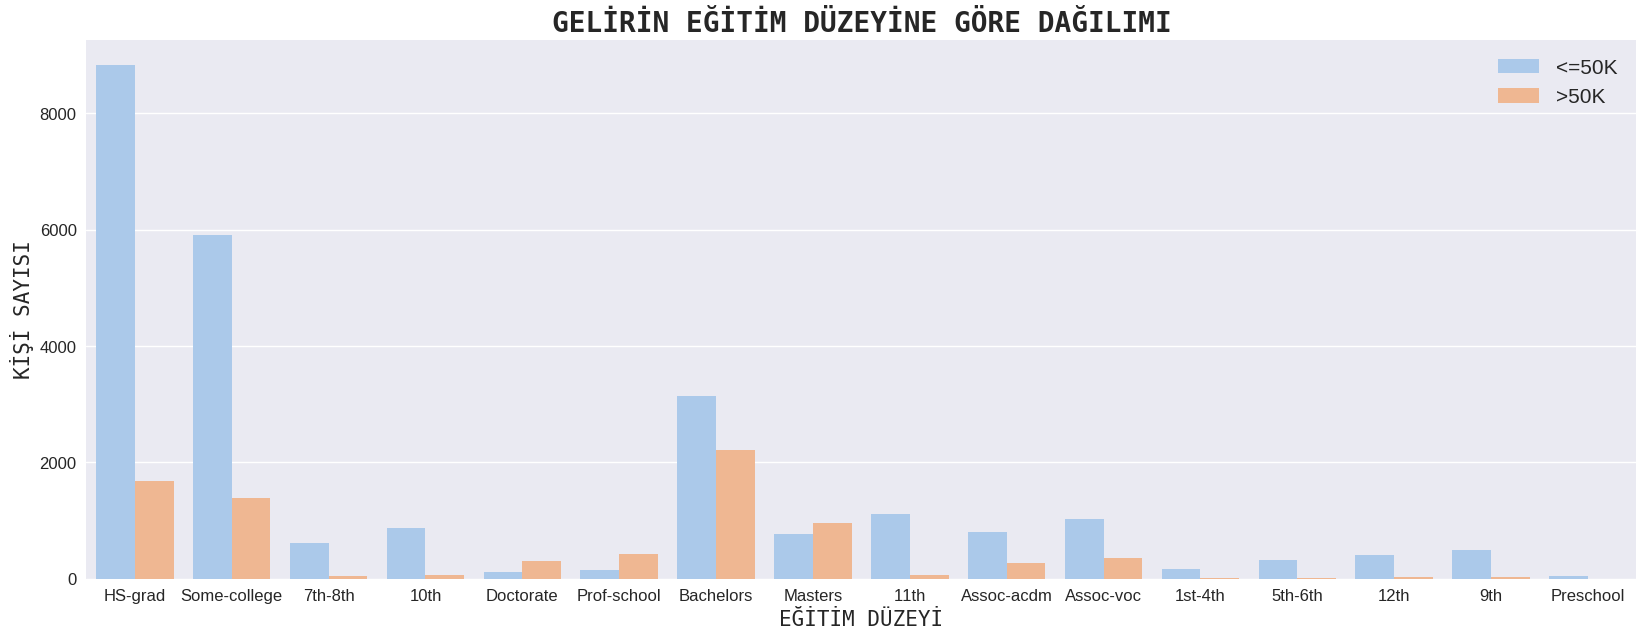

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(adult['education'],
              hue=adult['income'], palette="pastel")
plt.title('GELİRİN EĞİTİM DÜZEYİNE GÖRE DAĞILIMI', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('EĞİTİM DÜZEYİ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('KİŞİ SAYISI', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

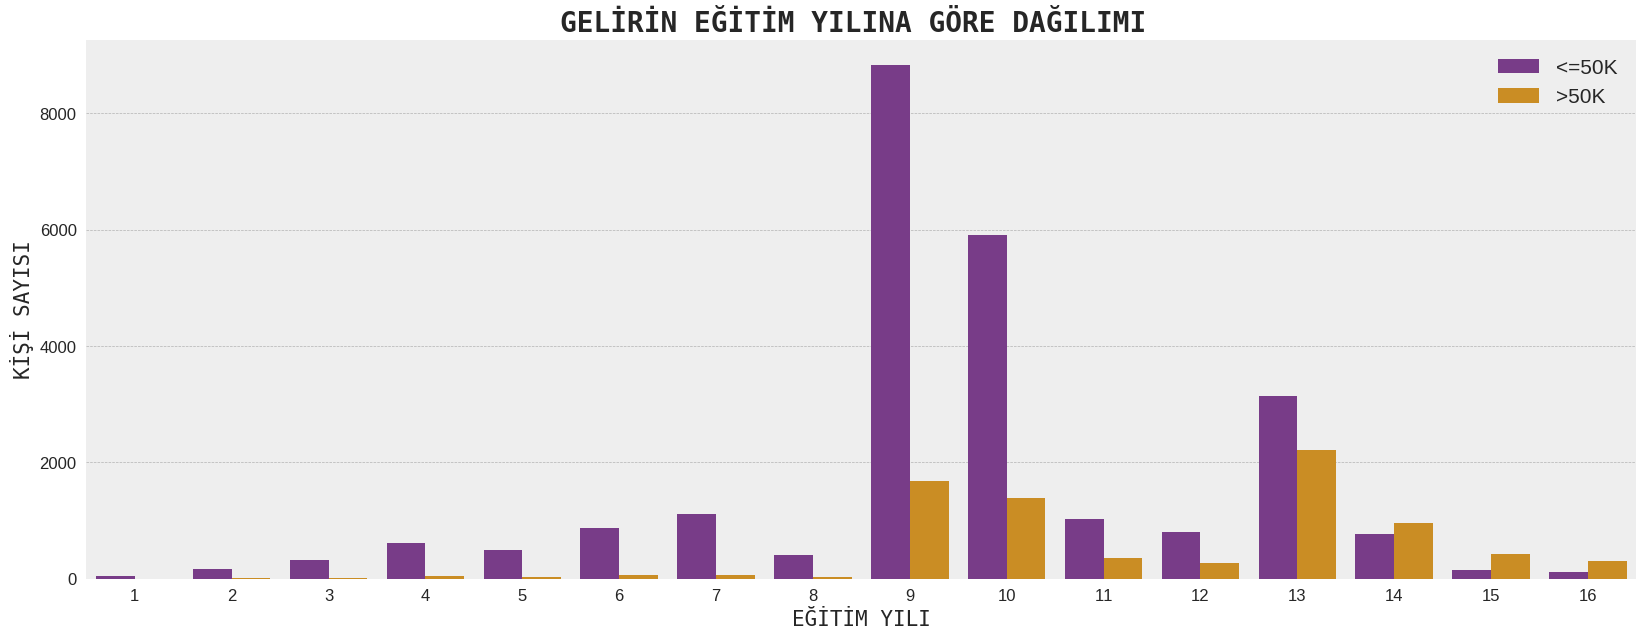

In [ ]:
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(adult['education.num'],
              hue=adult['income'],palette="CMRmap")
plt.title('GELİRİN EĞİTİM YILINA GÖRE DAĞILIMI ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('EĞİTİM YILI', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('KİŞİ SAYISI', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

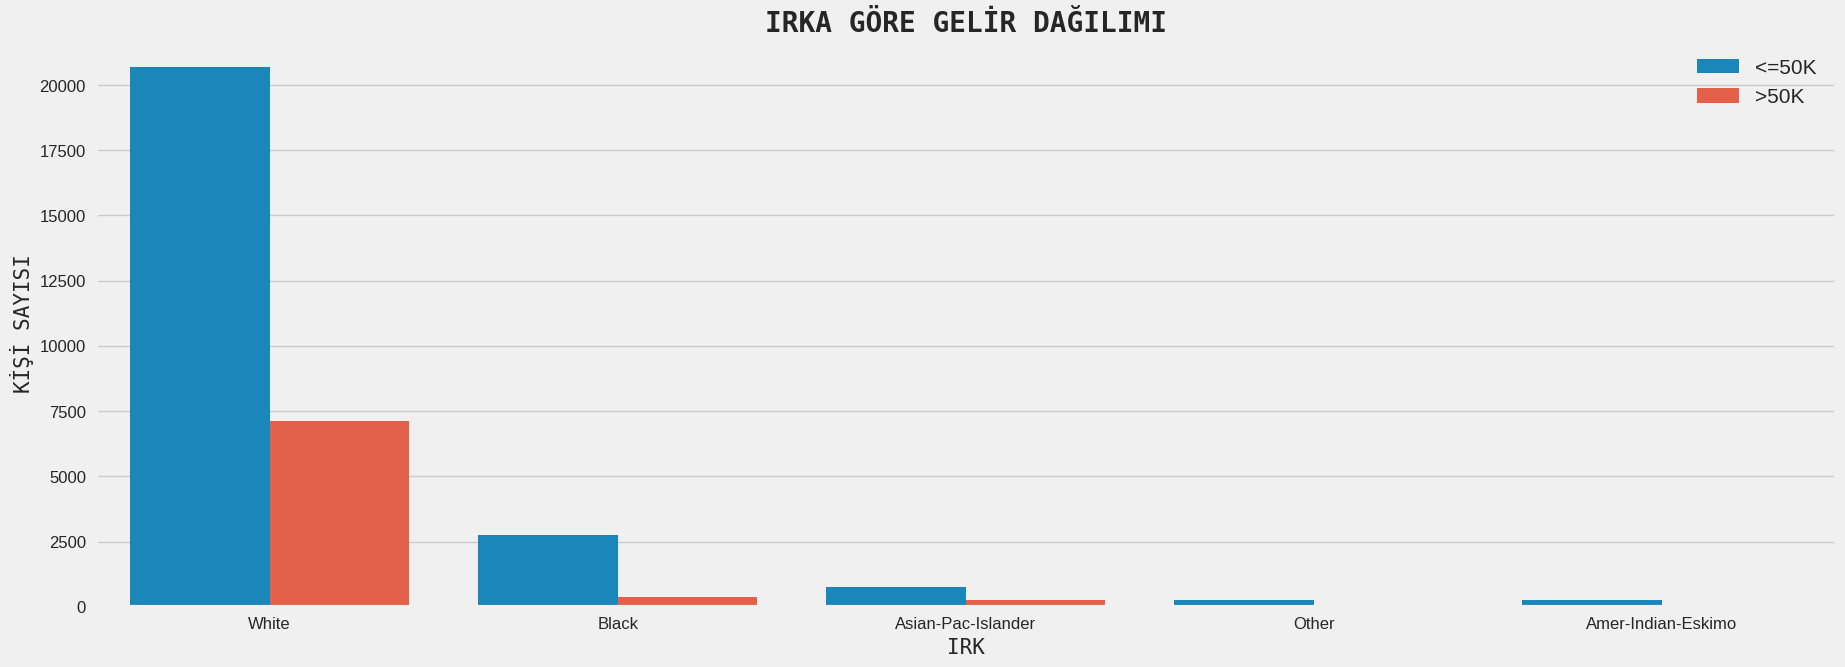

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(adult['race'], hue=adult['income'])
plt.title('IRKA GÖRE GELİR DAĞILIMI', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('IRK', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('KİŞİ SAYISI', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

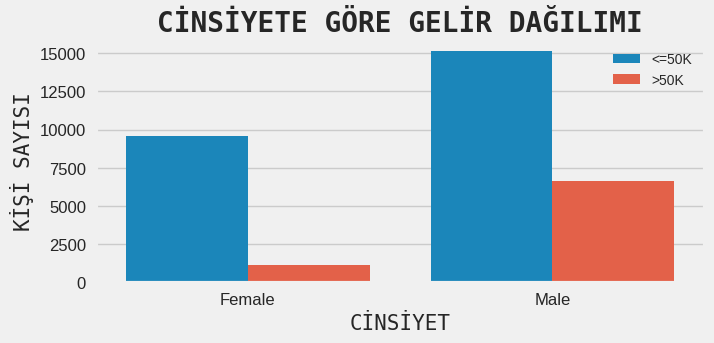

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(adult['sex'], hue=adult['income'])
plt.title('CİNSİYETE GÖRE GELİR DAĞILIMI', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('CİNSİYET', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('KİŞİ SAYISI', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

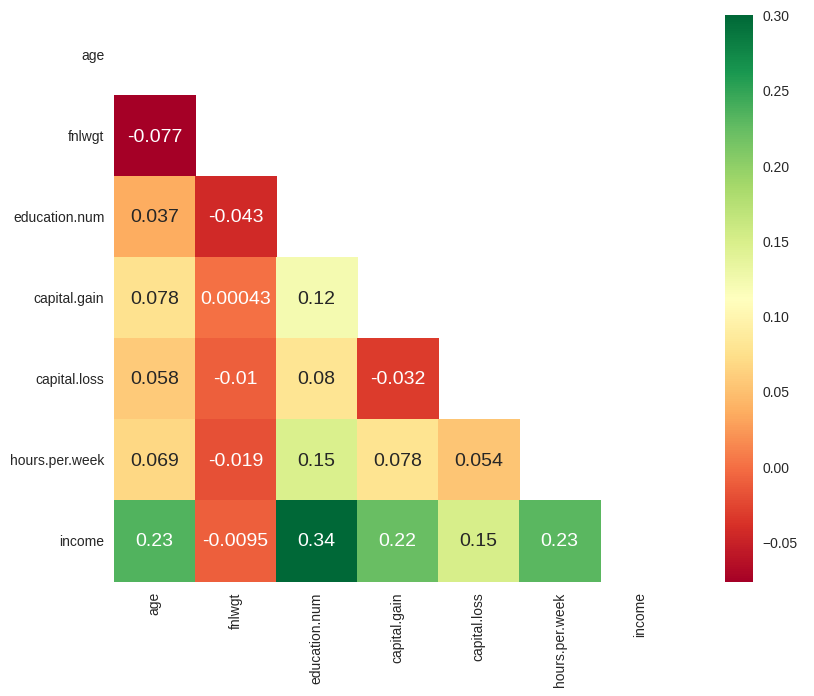

In [ ]:
corr = adult.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

In [ ]:
adult = adult.replace('?', np.nan)
round((adult.isnull().sum() / adult.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [ ]:
a=[adult['workclass'].mode(),adult["occupation"].mode(),adult['native.country'].mode()]
null_mode=pd.DataFrame(a)
null_mode

,0
0,Private
1,Prof-specialty
2,United-States


In [ ]:
columns_with_nan = ['workclass', 'occupation', 'native.country']
for col in columns_with_nan:
    adult[col].fillna(adult[col].mode()[0], inplace=True)

adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in adult.columns:
    if adult[col].dtypes == 'object':
        encoder = LabelEncoder()
        adult[col] = encoder.fit_transform(adult[col])
#label enconder ile verileri integera dönüştürdük.

In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [ ]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [ ]:
X = adult.drop('income', axis=1)
#income değişkenini çıkardık gerisi x oldu
Y = adult['income']
#y burada income değişkenine eşittir.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [ ]:
feature_imp = selector.feature_importances_
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.59
1 4.13
2 16.71
3 3.87
4 8.66
5 8.04
6 7.27
7 8.62
8 1.47
9 2.84
10 8.83
11 2.81
12 9.64
13 1.53


In [ ]:
df=pd.DataFrame(feature_imp*100,columns=["importance"])
df

,importance
0,15.587730
1,4.127781
2,16.710920
3,3.873650
4,8.655661
5,8.039849
6,7.269499
7,8.619665
8,1.471394
9,2.843241


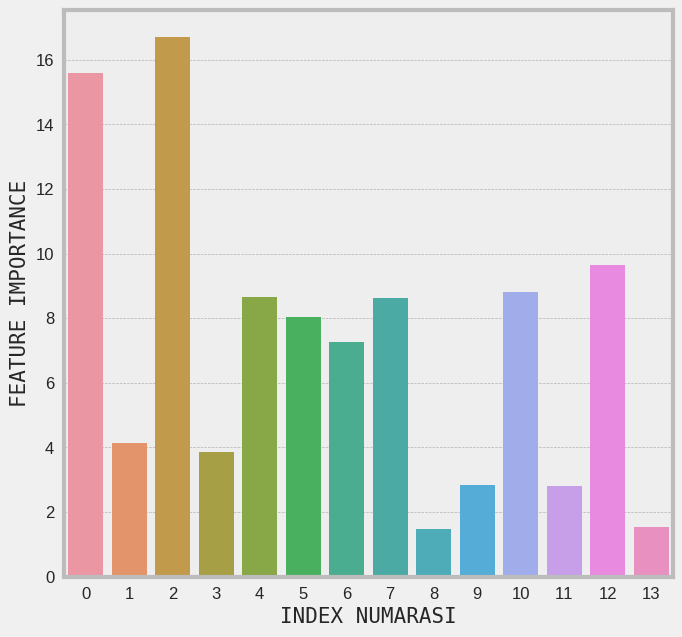

In [ ]:
importance=df["importance"].values
plt.style.use('bmh')
plt.figure(figsize=(7, 7))
sns.barplot(df.index,importance)
plt.title('', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('INDEX NUMARASI', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('FEATURE IMPORTANCE', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   fnlwgt          32561 non-null  float64
 2   education.num   32561 non-null  float64
 3   marital.status  32561 non-null  float64
 4   occupation      32561 non-null  float64
 5   relationship    32561 non-null  float64
 6   capital.gain    32561 non-null  float64
 7   hours.per.week  32561 non-null  float64
dtypes: float64(8)
memory usage: 2.0 MB


In [ ]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))
    

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   fnlwgt          32561 non-null  float64
 2   education.num   32561 non-null  float64
 3   marital.status  32561 non-null  float64
 4   occupation      32561 non-null  float64
 5   relationship    32561 non-null  float64
 6   capital.gain    32561 non-null  float64
 7   hours.per.week  32561 non-null  float64
dtypes: float64(8)
memory usage: 2.0 MB


In [ ]:
print(X)

            age    fnlwgt  education.num  marital.status  occupation  \
0      3.769612 -1.067997      -0.420060        2.249480    0.720237   
1      3.183112 -0.539169      -0.420060        2.249480   -0.790092   
2      2.010110 -0.035220      -0.031360        2.249480    0.720237   
3      1.130359 -0.468215      -2.363558       -1.734058   -0.034928   
4      0.177296  0.709482      -0.031360        1.585557    0.720237   
...         ...       ...            ...             ...         ...   
32556 -1.215643  1.140460      -0.031360        0.921634    0.971958   
32557 -0.849080  0.639741       0.746039       -0.406212    1.475401   
32558  0.103983 -0.335433      -0.420060       -0.406212   -0.034928   
32559  1.423610 -0.358777      -0.420060        2.249480   -1.545256   
32560 -1.215643  0.110960      -0.420060        0.921634   -1.545256   

       relationship  capital.gain  hours.per.week  
0         -0.277805      -0.14592       -0.035429  
1         -0.277805      -0.145

In [ ]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64


In [ ]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [ ]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=0)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 8)
X_test shape: (9888, 8)
Y_train shape: (39552,)
Y_test shape: (9888,)


# LOJİSTİK REGRESYON

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, Y_train)


LogisticRegression(random_state=0)

In [ ]:
Y_pred_log_reg = log_reg.predict(X_test)

# KNN SINIFLANDIRICISI



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [ ]:
Y_pred_knn = knn.predict(X_test)

# SUPPORT VECTOR CLASSIFIER

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=0)
svc.fit(X_train, Y_train)

SVC(random_state=0)

In [ ]:
Y_pred_svc = svc.predict(X_test)

# KARAR AĞACI SINIFLANDIRMASI

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
Y_pred_dec_tree = dec_tree.predict(X_test)

#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
Y_pred_ran_for = ran_for.predict(X_test)

#NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred_nb = nb.predict(X_test)

# MODEL DEĞERLENDİRMESİ

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 75.62
F1 score: 75.5


In [ ]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.42
F1 score: 84.43


In [ ]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.58
F1 score: 82.56


In [ ]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 64.68
F1 score: 48.42


In [ ]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 91.61
F1 score: 92.01


In [ ]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.6
F1 score: 92.93


#RANDOM FOREST SEÇİLDİ

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}
rf_tuned = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [ ]:
rf_cv.best_score_

0.9131271105332539

In [ ]:
rf_cv.best_params_

{'max_depth': 102, 'n_estimators': 40}

In [ ]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [ ]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [ ]:
Y_pred_rf_best = rf_best.predict(X_test)
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.77
F1 score: 93.08


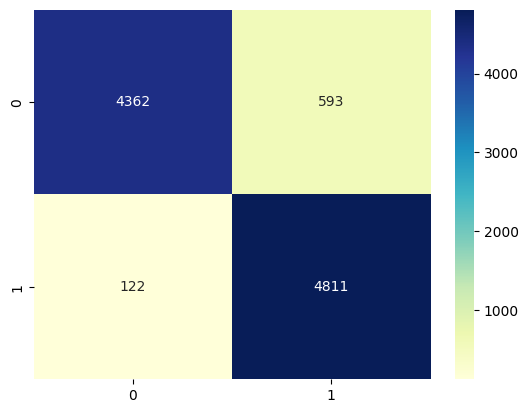

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4955
           1       0.89      0.98      0.93      4933

    accuracy                           0.93      9888
   macro avg       0.93      0.93      0.93      9888
weighted avg       0.93      0.93      0.93      9888

